1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Looking at the plot, we can see that we have a minimum around [0, 0.8] and [0, -0.8], so we use these values as initial guess.
	
The global minima of this function are:
x = -0.08984204618626522 y = 0.7126564139167028 with f = -1.0316284534898725 when the initial guess is [0, 0.8]
x = 0.08984203338873575 y = -0.7126564272279498 with f = -1.0316284534898714 when the initial guess is [0, -0.8]
	
If the initial guess is x=(0,0), the research of minima will return f =  0.0


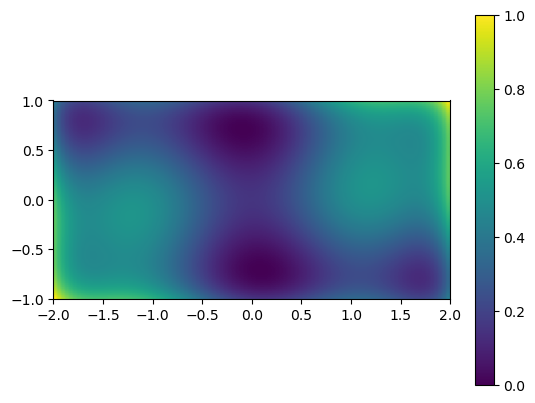

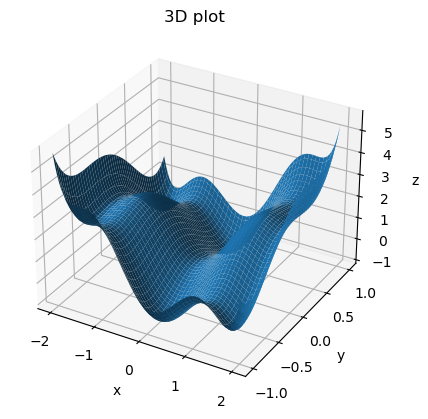

In [1]:
# DONE

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
from scipy import optimize

def my_func(x):
    return ((4-2.1*x[0]**2+x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2)

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
x1, y1 = np.meshgrid(x, y)
z1 = my_func([x1, y1])
pl.imshow(z1, origin='lower', extent=[-2, 2, -1, 1])
plt.colorbar(matplotlib.cm.ScalarMappable())

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x1, y1, z1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("3D plot")

print("Looking at the plot, we can see that we have a minimum around [0, 0.8] and [0, -0.8], so we use these values as initial guess.")
print("\t")

xy_minima = [[0, 0.8], [0, -0.8]]
print("The global minima of this function are:")
for pair in xy_minima:
    sol = optimize.minimize(fun=my_func, x0=pair)
    print("x =", sol.x[0], "y =", sol.x[1], "with f =", sol.fun, "when the initial guess is", pair)

sol_0 = optimize.minimize(fun=my_func, x0=[0,0])

print("\t")
print("If the initial guess is x=(0,0), the research of minima will return f = ", sol_0.fun)

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

Text(0, 0.5, '$omega$ [rad/s]')

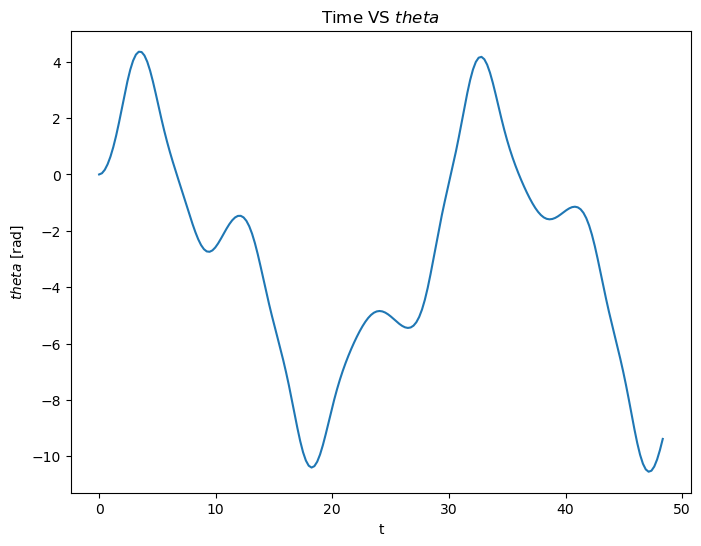

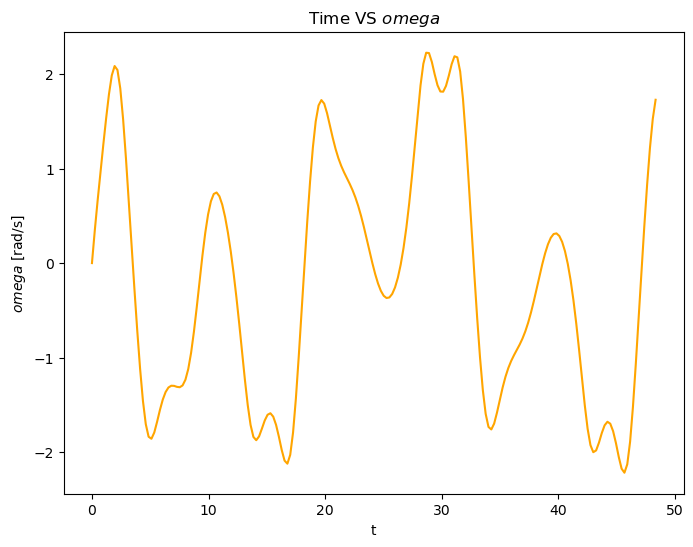

In [2]:
# DONE

from scipy.integrate import odeint

# initial conditions
omega_0 = 0.0
theta_0 = 0.0
Q = 2.0
d = 1.5
omega = 0.65

# define the interval
time_steps = np.linspace(0, 10*np.pi/omega, 200)

# functions to be called X=(theta, omega)
def derivative(X, time, Q, d):
    return (X[1], (-1/Q)*X[1] + np.sin(X[0]) + d*np.cos(omega*time))

# TASK 1: call the odeint() method
Xinit = (0, 0)
X = odeint(derivative, Xinit, time_steps, args=(Q, d))

# plot: time VS theta
plt.figure(figsize=(8, 6))
plt.title("Time VS $theta$")
plt.plot(time_steps, X[:, 0])
plt.xlabel('t')
plt.ylabel('$theta$ [rad]')

# plot: time VS omega
plt.figure(figsize=(8, 6))
plt.title("Time VS $omega$")
plt.plot(time_steps, X[:, 1], 'orange')
plt.xlabel('t')
plt.ylabel("$omega$ [rad/s]")

# determine if there is a set of parameters for which the motion is chaotic
# log of dispersion VS time


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [3]:
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

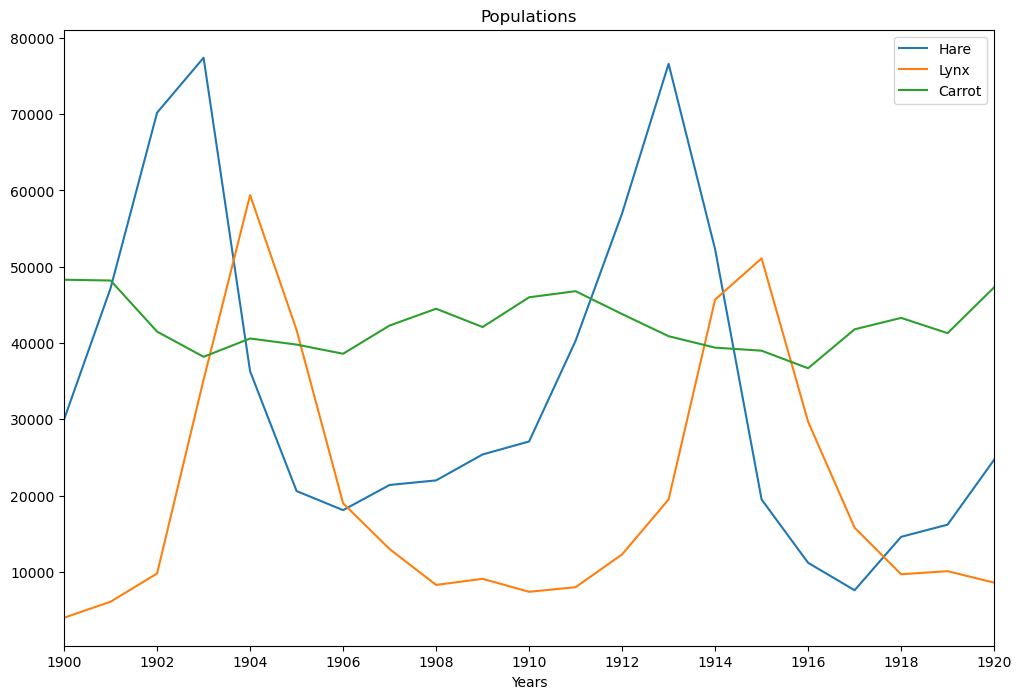

Text(0, 0.5, 'Power')

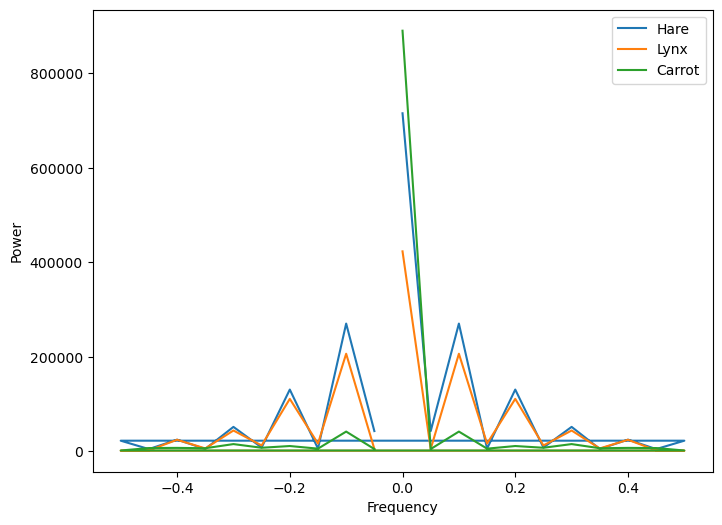

In [4]:
# DONE

from scipy import fftpack

data = np.loadtxt('data/populations.txt')
year, hare, lynx, carrot = data.T # transpose
plt.figure(figsize= [12,8])
axes= plt.axes()
axes.set_xlim([1900,1920])
axes.set_xticks(np.arange(1900,1921,2))
plt.plot(year, hare, year, lynx, year, carrot)
plt.legend(('Hare', 'Lynx', 'Carrot'))
plt.xlabel('Years')
plt.title("Populations")
plt.show()
time_step = (year.max()-year.min())/year.size

# fft
hare_fft = fftpack.fft(hare)
lynx_fft = fftpack.fft(lynx)
carrot_fft = fftpack.fft(carrot)

# power
hare_power = np.abs(hare_fft)
lynx_power = np.abs(lynx_fft)
carrot_power = np.abs(carrot_fft)

# freq
freq = fftpack.fftfreq(hare.size, d=time_step)

plt.figure(figsize=(8, 6))
plt.plot(freq, hare_power)
plt.plot(freq, lynx_power)
plt.plot(freq, carrot_power)
plt.legend(('Hare', 'Lynx', 'Carrot'))
plt.xlabel('Frequency')
plt.ylabel('Power')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
'Python'
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))


*Inspect the spectrum, and try to locate the regions of the power spectrum tht contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
*Apply the inverse Fourier transform to plot the resulting image.




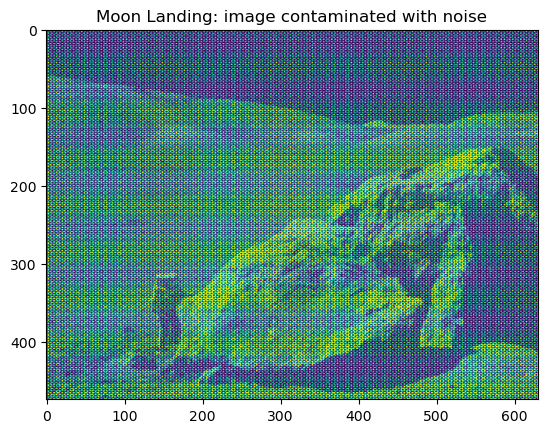

In the histogram we can notice that there are several components with a power over 4000 and we decide to set them to zero, considering them noise.


Text(0.5, 1.0, 'After filtering')

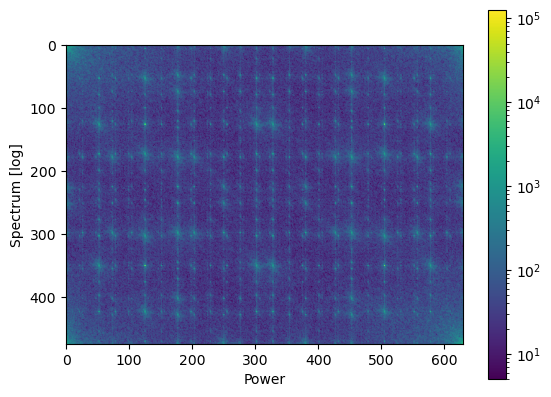

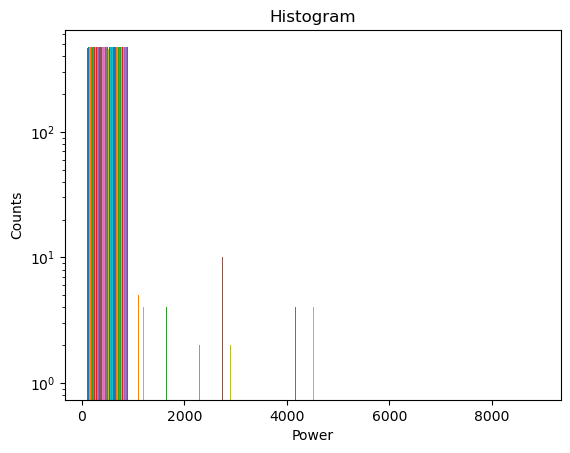

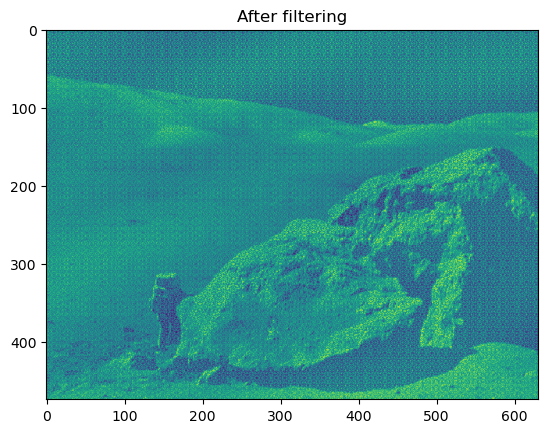

In [6]:
# DONE

import scipy
from matplotlib.colors import LogNorm 

time_step = 0.05

# original figure
moon = plt.imread("images/moonlanding.png")
plt.figure()
plt.imshow(moon)
plt.title("Moon Landing: image contaminated with noise")
plt.show()

# 2D FFT
moon_fft = scipy.fft.fft2(moon) #, s=None, axes=(- 2, - 1))
power = np.abs(moon_fft)
plt.figure()
plt.imshow(power, norm=LogNorm(vmin=5))
plt.colorbar()
plt.xlabel('Power')
plt.ylabel('Spectrum [log]')

# isolate signal (set noise to zero)
plt.figure()
plt.hist(power, bins = range(0,10000,1000), log = True)
plt.xlabel("Power")
plt.ylabel("Counts")
plt.title("Histogram")
print("In the histogram we can notice that there are several components with a power over 4000 and we decide to set them to zero, considering them noise.")
moon_fft[power > 4000] = 0

# inverse Fourier Transform
filtered_moon = scipy.fftpack.ifft2(moon_fft)
plt.figure()
plt.imshow(filtered_moon.real)
plt.title('After filtering')